<a href="https://colab.research.google.com/github/durnav/Ml-lab-exp/blob/main/sentimental_analysis_using_random_forest_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import re

In [ ]:
training = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [ ]:
print(training.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [ ]:
print(training.head())
print(test.head())

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation
      id                                              tweet
0  31963  #studiolife #aislife #requires #passion #dedic...
1  31964   @user #white #supremacists want everyone to s...
2  31965  safe ways to heal your #acne!!    #altwaystohe...
3  31966  is the hp and the cursed child book up for res...
4  31967    3rd #bihday to my amazing, hilarious #nephew...


In [ ]:
training.columns
test.columns

Index(['id', 'tweet'], dtype='object')

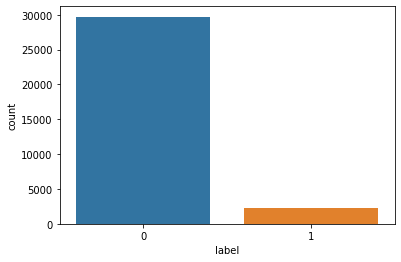

In [ ]:
sns.countplot(x='label', data=training)

In [ ]:
training["tweet"] = training["tweet"].str.replace("@user"," ") 
lst = [' a ',' b ',	' c ',	' d ',	' e ',	' f ',	' g ',	' h ',	' i ',	' j ',	' k ',	' l ',	' m ',	' n ',	' o ',	' p ',	' q ',	' r ',	' s ', ' t ',	' u ',	' v ',	' w ',	' x ',	' y ',	' z ']
for i in lst:
  training["tweet"] = training["tweet"].str.replace(i," ") 

#training["tweet"] = training["tweet"].str.replace("[^a-zA-Z#]", " ")
training.head(10)

,id,label,tweet
0,1,0,when father is dysfunctional and is so self...
1,2,0,thanks for #lyft credit can't use cause th...
2,3,0,bihday your majesty
3,4,0,#model love take with all the time in urð±...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,camping tomorrow dannyâ¦
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,welcome here ! i'm it's so #gr8 !


In [ ]:
test["tweet"] = test["tweet"].str.replace("@user"," ") 
lst = [' a ',' b ',	' c ',	' d ',	' e ',	' f ',	' g ',	' h ',	' i ',	' j ',	' k ',	' l ',	' m ',	' n ',	' o ',	' p ',	' q ',	' r ',	' s ', ' t ',	' u ',	' v ',	' w ',	' x ',	' y ',	' z ']
for i in lst:
  test["tweet"] = test["tweet"].str.replace(i," ")
test.head(10)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,#white #supremacists want everyone to see t...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,31971,will never understand why my dad left m...
9,31972,#delicious #food #lovelife #capetown mannaep...


In [ ]:
special = ["!", "@", "#", "$", "%", "^", "&", "*","(",")","_", "-", "+", "=", "?", ]
for i in special:
    training["tweet"] = training["tweet"].str.replace(i, " ")
    test["tweet"] = test["tweet"].str.replace(i, " ")

training.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


,id,label,tweet
0,1,0,when father is dysfunctional and is so self...
1,2,0,thanks for lyft credit can't use cause th...
2,3,0,bihday your majesty
3,4,0,model love take with all the time in urð±...
4,5,0,factsguide: society now motivation


In [ ]:
training["tweet"] = training["tweet"].str.replace("[^a-zA-Z0-9#]", " ")
test["tweet"] = test["tweet"].str.replace("[^a-zA-Z0-9#]", " ")

training.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,id,label,tweet
0,1,0,when father is dysfunctional and is so self...
1,2,0,thanks for lyft credit can t use cause th...
2,3,0,bihday your majesty
3,4,0,model love take with all the time in ur ...
4,5,0,factsguide society now motivation
5,6,0,2 2 huge fan fare and big talking before the...
6,7,0,camping tomorrow danny
7,8,0,the next school year is the year for exams ...
8,9,0,we won love the land allin cavs champ...
9,10,0,welcome here i m it s so gr8


In [ ]:
from collections import Counter 

all_words = []
for line in list(training['tweet']):
  words = line.split()
  for word in words:
    all_words.append(word.lower())

a = Counter(all_words).most_common(10)
a

[('the', 10229),
 ('to', 9863),
 ('you', 5952),
 ('and', 4947),
 ('in', 4675),
 ('for', 4510),
 ('of', 4256),
 ('is', 4197),
 ('i', 3736),
 ('my', 3716)]

In [ ]:
training['tweet'] = training['tweet'].apply(lambda x: x.split())
training.head()

,id,label,tweet
0,1,0,"[when, father, is, dysfunctional, and, is, so,..."
1,2,0,"[thanks, for, lyft, credit, can, t, use, cause..."
2,3,0,"[bihday, your, majesty]"
3,4,0,"[model, love, take, with, all, the, time, in, ur]"
4,5,0,"[factsguide, society, now, motivation]"


In [ ]:
test['tweet'] = test['tweet'].apply(lambda x: x.split())
test.head()

,id,tweet
0,31963,"[studiolife, aislife, requires, passion, dedic..."
1,31964,"[white, supremacists, want, everyone, to, see,..."
2,31965,"[safe, ways, to, heal, your, acne, altwaystohe..."
3,31966,"[is, the, hp, and, the, cursed, child, book, u..."
4,31967,"[3rd, bihday, to, my, amazing, hilarious, neph..."


In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

training['tweet'] = training['tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
training.head()

,id,label,tweet
0,1,0,"[when, father, is, dysfunct, and, is, so, self..."
1,2,0,"[thank, for, lyft, credit, can, t, use, caus, ..."
2,3,0,"[bihday, your, majesti]"
3,4,0,"[model, love, take, with, all, the, time, in, ur]"
4,5,0,"[factsguid, societi, now, motiv]"


In [ ]:
test['tweet'] = test['tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
test.head()

,id,tweet
0,31963,"[studiolif, aislif, requir, passion, dedic, wi..."
1,31964,"[white, supremacist, want, everyon, to, see, t..."
2,31965,"[safe, way, to, heal, your, acn, altwaystoh, h..."
3,31966,"[is, the, hp, and, the, curs, child, book, up,..."
4,31967,"[3rd, bihday, to, my, amaz, hilari, nephew, el..."


In [ ]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords 

from nltk.tokenize import word_tokenize
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
newStopWords = ['u','go','get','via','or','ur','us','in','i','let','the','to','is','amp','make','one','days','get']
stopwords.extend(newStopWords)

In [ ]:
import string 

def process(text):
  nopunc = set(char for char in list(text) if char not in string.punctuation)
  nopunc = " ".join(nopunc)
  return[word for word in nopunc.lower().split() if word.lower() not in stopwords]

In [ ]:
training['tweet'] = training['tweet'].apply(process)
training.head()

,id,label,tweet
0,1,0,"[dysfunct, drag, father, run, hi, selfish, kid]"
1,2,0,"[disapoint, pdx, offer, lyft, caus, van, getth..."
2,3,0,"[majesti, bihday]"
3,4,0,"[love, model, take, time]"
4,5,0,"[factsguid, motiv, societi]"


In [ ]:
test['tweet'] = test['tweet'].apply(process)
test.head()

,id,tweet
0,31963,"[requir, aislif, passion, newmateri, dedic, fi..."
1,31964,"[supremacist, everyon, white, see, movi, whi, ..."
2,31965,"[heal, acn, healthi, altwaystoh, way, safe]"
3,31966,"[pottermor, curs, harrypott, child, ye, favori..."
4,31967,"[nephew, hilari, love, eli, dave, uncl, amaz, ..."


In [ ]:
training
test

,id,tweet
0,31963,"[requir, aislif, passion, newmateri, dedic, fi..."
1,31964,"[supremacist, everyon, white, see, movi, whi, ..."
2,31965,"[heal, acn, healthi, altwaystoh, way, safe]"
3,31966,"[pottermor, curs, harrypott, child, ye, favori..."
4,31967,"[nephew, hilari, love, eli, dave, uncl, amaz, ..."
...,...,...
17192,49155,"[thought, polaris, gt, uselections2016, 3, bre..."
17193,49156,"[gown, dress, feel, wed, hairflip, neverreadi,..."
17194,49157,"[never, today, asset, word, liabil, omg, use, ..."
17195,49158,"[organ, happi, cultur, work, confer, right, de..."


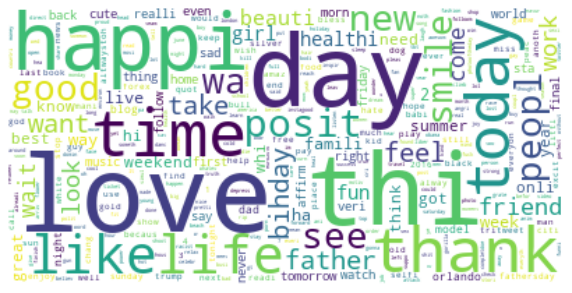

In [ ]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
words = []
for line in training['tweet']:
  words.extend(line)
wordfreq = Counter(words)
wordcloud = WordCloud(
    background_color='white',
    max_words = 2000,
    stopwords = stopwords
).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

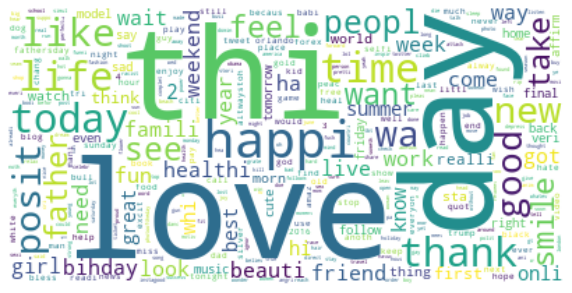

In [ ]:
for line in test['tweet']:
  words.extend(line)
wordfreq = Counter(words)
wordcloud = WordCloud(
    background_color='white',
    max_words = 2000,
    stopwords = stopwords
).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [ ]:
def string(text):
  to_return=""
  for i in list(text):
    to_return += str(i) + " "
  to_return = to_return[:-1]
  return to_return

training['tweet'] = training['tweet'].apply(string)
training.head

<bound method NDFrame.head of           id  label                                              tweet
0          1      0            dysfunct drag father run hi selfish kid
1          2      0  disapoint pdx offer lyft caus van getthank tha...
2          3      0                                     majesti bihday
3          4      0                               love model take time
4          5      0                            factsguid motiv societi
...      ...    ...                                                ...
31957  31958      0                                      youuu ate isz
31958  31959      0  wrap airwav tri shame chisolm shirley nina man...
31959  31960      0               song otw listen monday sad work morn
31960  31961      1        wso calgari act vandalis templ condemn sikh
31961  31962      0                                       follow thank

[31962 rows x 3 columns]>

In [ ]:
test['tweet'] = test['tweet'].apply(string)
test.head

<bound method NDFrame.head of           id                                              tweet
0      31963  requir aislif passion newmateri dedic find wil...
1      31964  supremacist everyon white see movi whi bird wa...
2      31965               heal acn healthi altwaystoh way safe
3      31966  pottermor curs harrypott child ye favorit alre...
4      31967  nephew hilari love eli dave uncl amaz bihday 3...
...      ...                                                ...
17192  49155  thought polaris gt uselections2016 3 brexit le...
17193  49156  gown dress feel wed hairflip neverreadi mermai...
17194  49157  never today asset word liabil omg use onc clin...
17195  49158  organ happi cultur work confer right develop l...
17196  49159     song glad download newsong newmus shoegaz free

[17197 rows x 2 columns]>

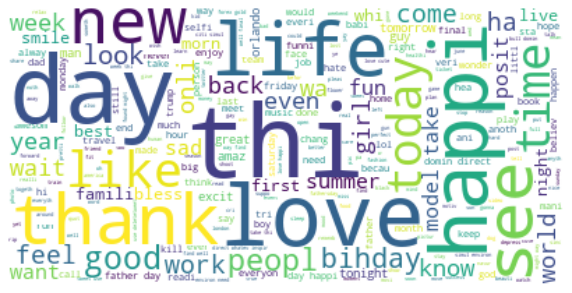

In [ ]:
positive = [r for r in training['tweet'][training['label']==0]]
pos = ''.join(positive)

#draw a word cloud with word frequencies 
wordcloud = WordCloud(
    background_color = 'white',
    max_words = 2000,
    stopwords =stopwords
).generate(pos)
plt.figure(figsize = (10,9))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

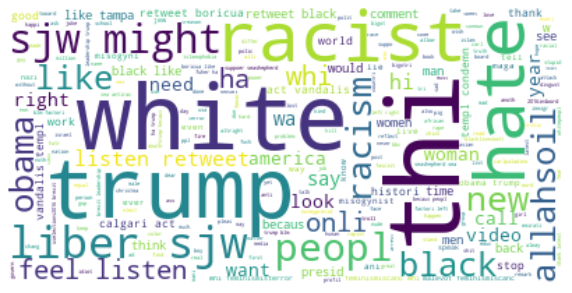

In [ ]:
negative = [r for r in training['tweet'][training['label']==1]]
neg = ''.join(negative)

#draw a word cloud with word frequencies 
wordcloud = WordCloud(
    background_color = 'white',
    max_words = 2000,
    stopwords =stopwords
).generate(neg)
plt.figure(figsize = (10,9))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [ ]:
print(training)
print(test)

          id  label                                              tweet
0          1      0            dysfunct drag father run hi selfish kid
1          2      0  disapoint pdx offer lyft caus van getthank tha...
2          3      0                                     majesti bihday
3          4      0                               love model take time
4          5      0                            factsguid motiv societi
...      ...    ...                                                ...
31957  31958      0                                      youuu ate isz
31958  31959      0  wrap airwav tri shame chisolm shirley nina man...
31959  31960      0               song otw listen monday sad work morn
31960  31961      1        wso calgari act vandalis templ condemn sikh
31961  31962      0                                       follow thank

[31962 rows x 3 columns]
          id                                              tweet
0      31963  requir aislif passion newmateri dedic find w

In [ ]:
training.drop(columns = "id", axis = 1)

,label,tweet
0,0,dysfunct drag father run hi selfish kid
1,0,disapoint pdx offer lyft caus van getthank tha...
2,0,majesti bihday
3,0,love model take time
4,0,factsguid motiv societi
...,...,...
31957,0,youuu ate isz
31958,0,wrap airwav tri shame chisolm shirley nina man...
31959,0,song otw listen monday sad work morn
31960,1,wso calgari act vandalis templ condemn sikh


In [ ]:
test.drop(columns = "id", axis = 1)

,tweet
0,requir aislif passion newmateri dedic find wil...
1,supremacist everyon white see movi whi bird wa...
2,heal acn healthi altwaystoh way safe
3,pottermor curs harrypott child ye favorit alre...
4,nephew hilari love eli dave uncl amaz bihday 3...
...,...
17192,thought polaris gt uselections2016 3 brexit le...
17193,gown dress feel wed hairflip neverreadi mermai...
17194,never today asset word liabil omg use onc clin...
17195,organ happi cultur work confer right develop l...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(training['tweet'],training['label'], test_size=0.2, random_state = 42 )

print("training_set :", x_train.shape,y_train.shape)
print("testing_set :", x_test.shape,y_test.shape)

training_set : (25569,) (25569,)
testing_set : (6393,) (6393,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [ ]:
test_x = test['tweet']
test_x

0        requir aislif passion newmateri dedic find wil...
1        supremacist everyon white see movi whi bird wa...
2                     heal acn healthi altwaystoh way safe
3        pottermor curs harrypott child ye favorit alre...
4        nephew hilari love eli dave uncl amaz bihday 3...
                               ...                        
17192    thought polaris gt uselections2016 3 brexit le...
17193    gown dress feel wed hairflip neverreadi mermai...
17194    never today asset word liabil omg use onc clin...
17195    organ happi cultur work confer right develop l...
17196       song glad download newsong newmus shoegaz free
Name: tweet, Length: 17197, dtype: object

In [ ]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts) 

print(x_train_counts.shape)
print(x_train_tfidf.shape)

(25569, 28353)
(25569, 28353)


In [ ]:
test_x_counts = count_vect.transform(test_x)
test_x_tfidf = transformer.transform(test_x_counts)
print(test_x_counts.shape)
print(test_x_tfidf.shape)

(17197, 28353)
(17197, 28353)


In [ ]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)
print(x_test_counts.shape)
print(x_test_tfidf.shape)

(6393, 28353)
(6393, 28353)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 200)
model.fit(x_train_tfidf,y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
prediction = model.predict(x_test_tfidf)

In [ ]:
submission = model.predict(x_test_tfidf)

In [ ]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,prediction)*100

96.19896762083529